In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

plt.style.use('seaborn')
pd.set_option('display.max_columns', None)

In [2]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')
allData = pd.concat(objs=[train,test], axis=0, ignore_index=True, sort=False)

In [3]:
na_cols, na_counts = [], []
for col in allData.columns[:-1]:
    if(allData[col].isnull().any()):
        na_cols.append(col)
        na_counts.append(len(allData[allData[col]!=allData[col]]))
        print('({})  {}, {} NA values'.format(allData[col].dtype, col, len(allData[allData[col]!=allData[col]])))
print('\nOut of total {} columns, there are {} columns containing NA values'.format(len(allData.columns[:-1]), len(na_cols)))

(object)  MSZoning, 4 NA values
(float64)  LotFrontage, 486 NA values
(object)  Alley, 2721 NA values
(object)  Utilities, 2 NA values
(object)  Exterior1st, 1 NA values
(object)  Exterior2nd, 1 NA values
(object)  MasVnrType, 24 NA values
(float64)  MasVnrArea, 23 NA values
(object)  BsmtQual, 81 NA values
(object)  BsmtCond, 82 NA values
(object)  BsmtExposure, 82 NA values
(object)  BsmtFinType1, 79 NA values
(float64)  BsmtFinSF1, 1 NA values
(object)  BsmtFinType2, 80 NA values
(float64)  BsmtFinSF2, 1 NA values
(float64)  BsmtUnfSF, 1 NA values
(float64)  TotalBsmtSF, 1 NA values
(object)  Electrical, 1 NA values
(float64)  BsmtFullBath, 2 NA values
(float64)  BsmtHalfBath, 2 NA values
(object)  KitchenQual, 1 NA values
(object)  Functional, 2 NA values
(object)  FireplaceQu, 1420 NA values
(object)  GarageType, 157 NA values
(float64)  GarageYrBlt, 159 NA values
(object)  GarageFinish, 159 NA values
(float64)  GarageCars, 1 NA values
(float64)  GarageArea, 1 NA values
(object)  

In [4]:
intCol, intNaCol = [], []
for col in allData.columns[1:-1]:
    if(allData[col].dtypes!=np.object):
        intCol.append(col)
        if(allData[col].isnull().any()):
            intNaCol.append(col)
intCol.sort(reverse=False)
print(intCol)

['1stFlrSF', '2ndFlrSF', '3SsnPorch', 'BedroomAbvGr', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtFullBath', 'BsmtHalfBath', 'BsmtUnfSF', 'EnclosedPorch', 'Fireplaces', 'FullBath', 'GarageArea', 'GarageCars', 'GarageYrBlt', 'GrLivArea', 'HalfBath', 'KitchenAbvGr', 'LotArea', 'LotFrontage', 'LowQualFinSF', 'MSSubClass', 'MasVnrArea', 'MiscVal', 'MoSold', 'OpenPorchSF', 'OverallCond', 'OverallQual', 'PoolArea', 'ScreenPorch', 'TotRmsAbvGrd', 'TotalBsmtSF', 'WoodDeckSF', 'YearBuilt', 'YearRemodAdd', 'YrSold']


In [5]:
intNaCol.sort(reverse=False)
print(intNaCol)

['BsmtFinSF1', 'BsmtFinSF2', 'BsmtFullBath', 'BsmtHalfBath', 'BsmtUnfSF', 'GarageArea', 'GarageCars', 'GarageYrBlt', 'LotFrontage', 'MasVnrArea', 'TotalBsmtSF']


In [6]:
intNoNACol = intCol.copy()
for f in intNaCol:
    intNoNACol.remove(f)
print(intNoNACol)

['1stFlrSF', '2ndFlrSF', '3SsnPorch', 'BedroomAbvGr', 'EnclosedPorch', 'Fireplaces', 'FullBath', 'GrLivArea', 'HalfBath', 'KitchenAbvGr', 'LotArea', 'LowQualFinSF', 'MSSubClass', 'MiscVal', 'MoSold', 'OpenPorchSF', 'OverallCond', 'OverallQual', 'PoolArea', 'ScreenPorch', 'TotRmsAbvGrd', 'WoodDeckSF', 'YearBuilt', 'YearRemodAdd', 'YrSold']


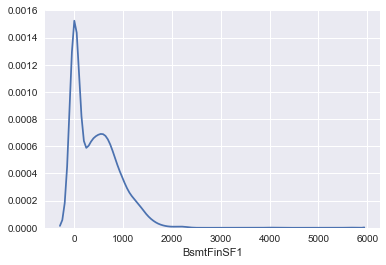

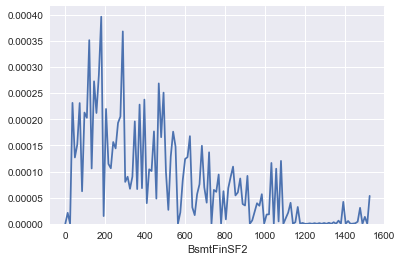

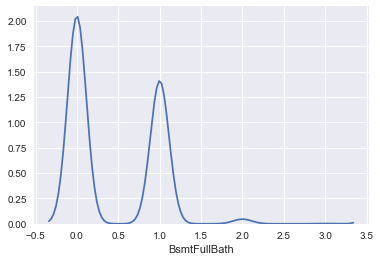

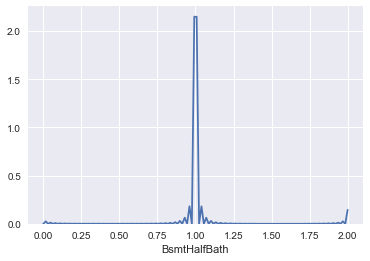

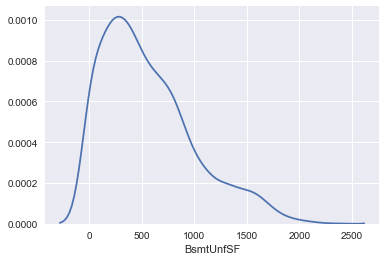

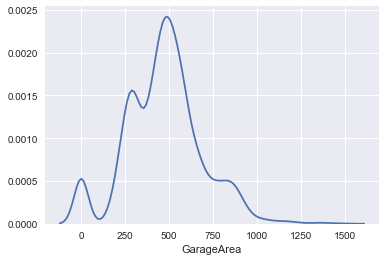

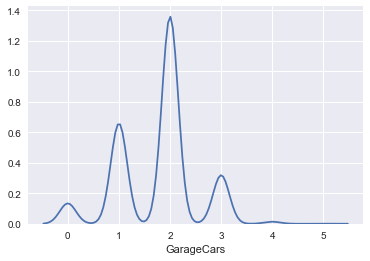

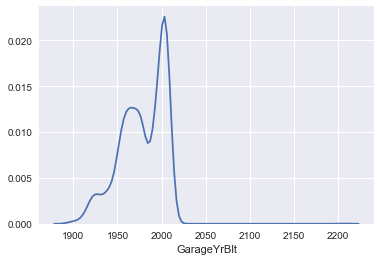

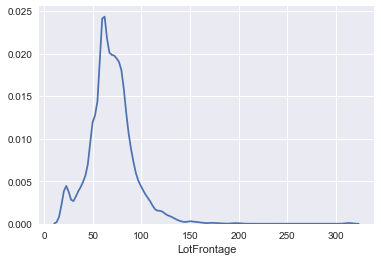

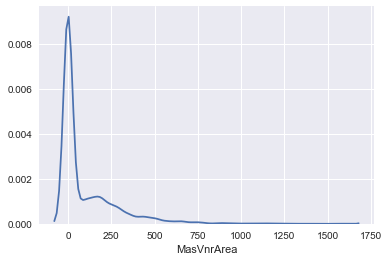

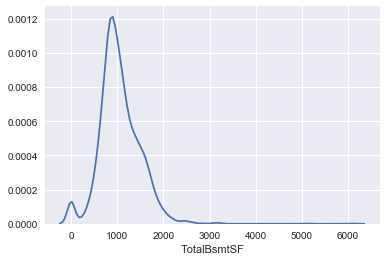

In [7]:
# Distribution for features with missing values:
for feature in intNaCol:
    plt.figure()
    sns.distplot(a=allData[feature], hist=False)

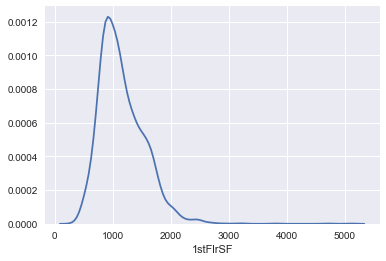

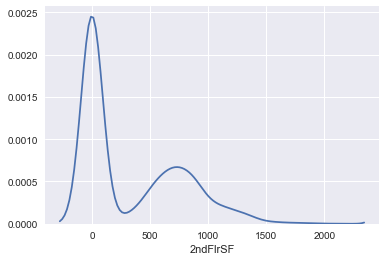

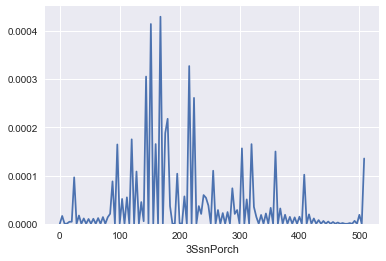

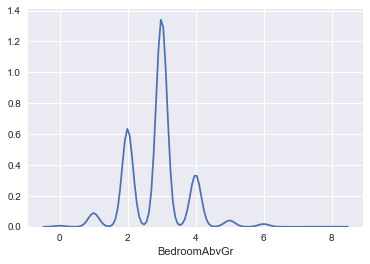

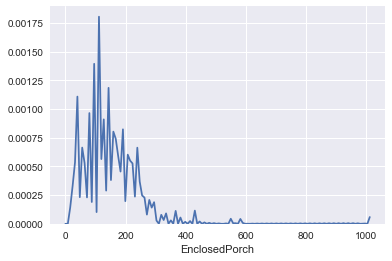

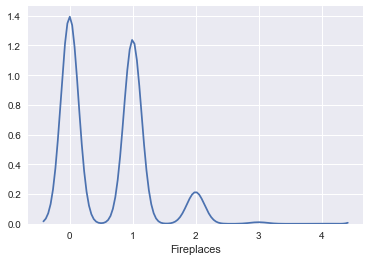

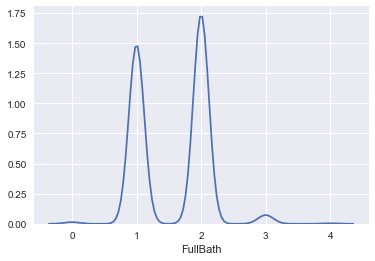

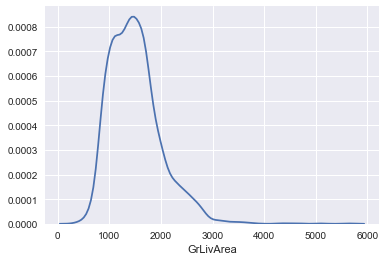

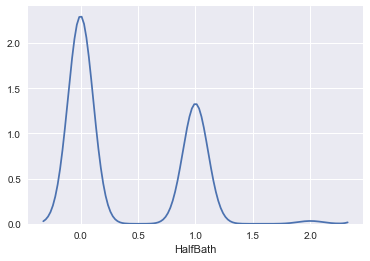

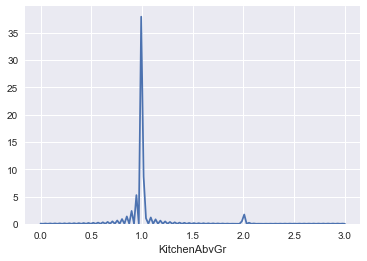

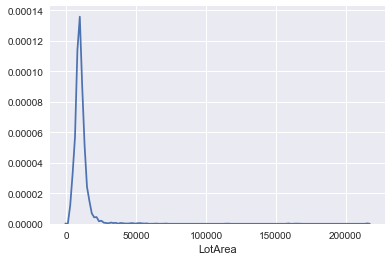

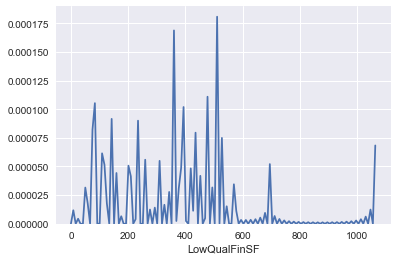

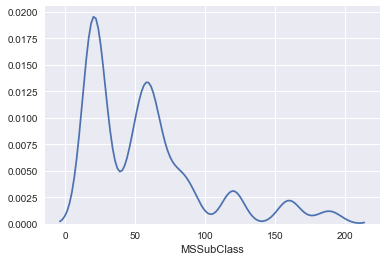

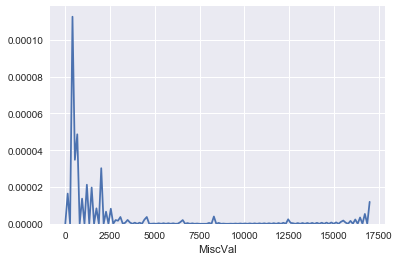

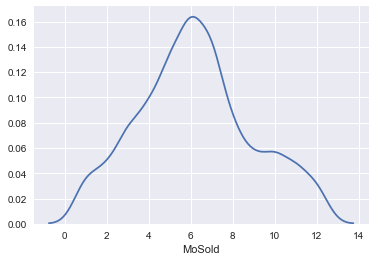

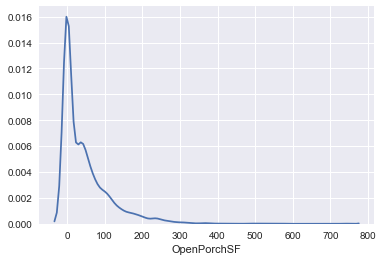

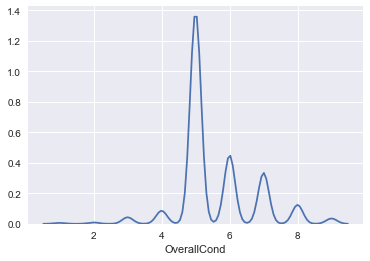

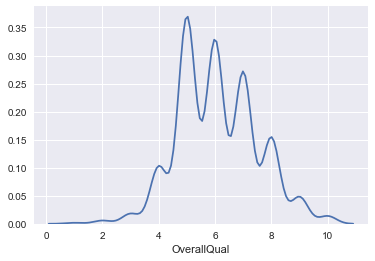

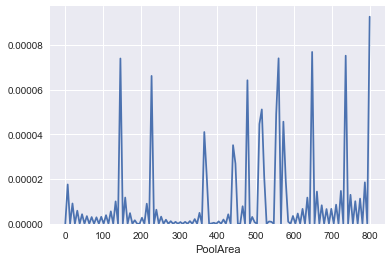

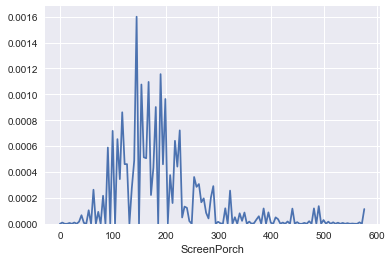

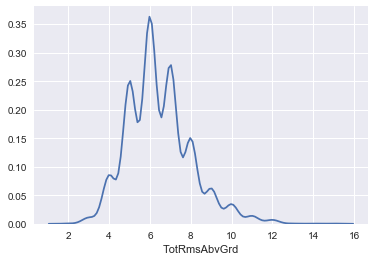

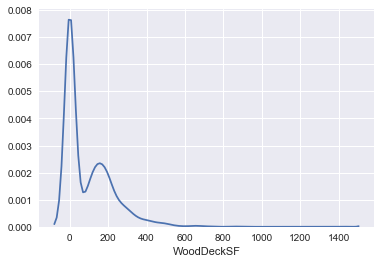

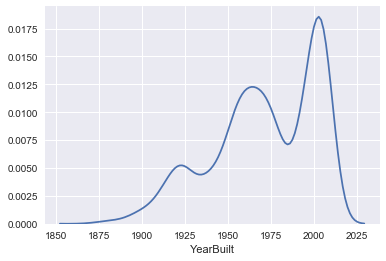

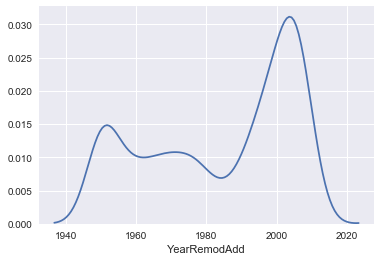

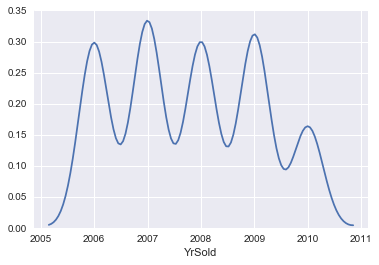

In [8]:
# Distribution for features without missing values:
for f in intNoNACol:
    plt.figure()
    sns.distplot(a=allData[f], hist=False)

---

### Feature Engineering (with NA numerical features):

#### BsmtFinSF1, BsmtFinSF2:
- Decision: 
    - Drop BsmtFinSF2 OR might drop both of them
    - Impute NA (BsmtFinSF1) with mean

In [9]:
# Rows containing missing values for each feature:
for f in ['BsmtFinSF1','BsmtFinSF2']:
    display(allData[allData[f].isnull()])

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
2120,2121,20,RM,99.0,5940,Pave,NaN,IR1,Lvl,AllPub,FR3,Gtl,BrkSide,Feedr,Norm,1Fam,1Story,4,7,1946,1950,Gable,CompShg,MetalSd,CBlock,None,0.0,TA,TA,PConc,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,GasA,TA,Y,FuseA,896,0,0,896,NaN,NaN,1,0,2,1,TA,4,Typ,0,NaN,Detchd,1946.0,Unf,1.0,280.0,TA,TA,Y,0,0,0,0,0,0,NaN,MnPrv,NaN,0,4,2008,ConLD,Abnorml,NaN


,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
2120,2121,20,RM,99.0,5940,Pave,NaN,IR1,Lvl,AllPub,FR3,Gtl,BrkSide,Feedr,Norm,1Fam,1Story,4,7,1946,1950,Gable,CompShg,MetalSd,CBlock,None,0.0,TA,TA,PConc,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,GasA,TA,Y,FuseA,896,0,0,896,NaN,NaN,1,0,2,1,TA,4,Typ,0,NaN,Detchd,1946.0,Unf,1.0,280.0,TA,TA,Y,0,0,0,0,0,0,NaN,MnPrv,NaN,0,4,2008,ConLD,Abnorml,NaN


In [10]:
def summary_df(data, features, na):
    if(na):
        display(pd.DataFrame(data={
            'Features': features,
            'NA ratio': [len(data[data[f].isnull()])/len(data) for f in features],
            '0.0 ratio': [len(data[data[f]==.0])/len(data) for f in features],
            'NA counts': [len(data[data[f].isnull()==True]) for f in features],
            '0.0 counts': [len(data[data[f]==.0]) for f in features],
            'Total rows': [len(data)]*len(features),
            'Mean': [data[f].mean() for f in features],
            'Median': [data[f].median() for f in features],
            'Mode': [data[f].mode()[0] for f in features]
        }).set_index('Features'))
    else:
        display(pd.DataFrame(data={
            'Features': features,
            '0.0 ratio': [len(data[data[f]==.0])/len(data) for f in features],
            '0.0 counts': [len(data[data[f]==.0]) for f in features],
            'Total rows': [len(data)]*len(features),
            'Mean': [data[f].mean() for f in features],
            'Median': [data[f].median() for f in features],
            'Mode': [data[f].mode()[0] for f in features]
        }).set_index('Features'))
    display(allData[features].describe())

In [11]:
summary_df(data=allData, features=['BsmtFinSF1','BsmtFinSF2'], na=True)

,NA ratio,0.0 ratio,NA counts,0.0 counts,Total rows,Mean,Median,Mode
Features,,,,,,,,
BsmtFinSF1,0.000343,0.318260,1,929,2919,441.423235,368.5,0.0
BsmtFinSF2,0.000343,0.880781,1,2571,2919,49.582248,0.0,0.0


,BsmtFinSF1,BsmtFinSF2
count,2918.000000,2918.000000
mean,441.423235,49.582248
std,455.610826,169.205611
min,0.000000,0.000000
25%,0.000000,0.000000
50%,368.500000,0.000000
75%,733.000000,0.000000
max,5644.000000,1526.000000


#### BsmtFullBath, BsmtHalfBath, BsmtUnfSF:

- Decision:
    - Drop BsmtHalfBath OR drop both of them.
    - Impute NA (BsmtUnfSF) with mean

In [12]:
# Rows containing missing values for each feature:
for f in ['BsmtFullBath', 'BsmtHalfBath', 'BsmtUnfSF']:
    display(allData[allData[f].isnull()])

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
2120,2121,20,RM,99.0,5940,Pave,NaN,IR1,Lvl,AllPub,FR3,Gtl,BrkSide,Feedr,Norm,1Fam,1Story,4,7,1946,1950,Gable,CompShg,MetalSd,CBlock,None,0.0,TA,TA,PConc,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,GasA,TA,Y,FuseA,896,0,0,896,NaN,NaN,1,0,2,1,TA,4,Typ,0,NaN,Detchd,1946.0,Unf,1.0,280.0,TA,TA,Y,0,0,0,0,0,0,NaN,MnPrv,NaN,0,4,2008,ConLD,Abnorml,NaN
2188,2189,20,RL,123.0,47007,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Edwards,Norm,Norm,1Fam,1Story,5,7,1959,1996,Gable,CompShg,Plywood,Plywood,None,0.0,TA,TA,Slab,NaN,NaN,NaN,NaN,0.0,NaN,0.0,0.0,0.0,GasA,TA,Y,SBrkr,3820,0,0,3820,NaN,NaN,3,1,5,1,Ex,11,Typ,2,Gd,Attchd,1959.0,Unf,2.0,624.0,TA,TA,Y,0,372,0,0,0,0,NaN,NaN,NaN,0,7,2008,WD,Normal,NaN


,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
2120,2121,20,RM,99.0,5940,Pave,NaN,IR1,Lvl,AllPub,FR3,Gtl,BrkSide,Feedr,Norm,1Fam,1Story,4,7,1946,1950,Gable,CompShg,MetalSd,CBlock,None,0.0,TA,TA,PConc,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,GasA,TA,Y,FuseA,896,0,0,896,NaN,NaN,1,0,2,1,TA,4,Typ,0,NaN,Detchd,1946.0,Unf,1.0,280.0,TA,TA,Y,0,0,0,0,0,0,NaN,MnPrv,NaN,0,4,2008,ConLD,Abnorml,NaN
2188,2189,20,RL,123.0,47007,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Edwards,Norm,Norm,1Fam,1Story,5,7,1959,1996,Gable,CompShg,Plywood,Plywood,None,0.0,TA,TA,Slab,NaN,NaN,NaN,NaN,0.0,NaN,0.0,0.0,0.0,GasA,TA,Y,SBrkr,3820,0,0,3820,NaN,NaN,3,1,5,1,Ex,11,Typ,2,Gd,Attchd,1959.0,Unf,2.0,624.0,TA,TA,Y,0,372,0,0,0,0,NaN,NaN,NaN,0,7,2008,WD,Normal,NaN


,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
2120,2121,20,RM,99.0,5940,Pave,NaN,IR1,Lvl,AllPub,FR3,Gtl,BrkSide,Feedr,Norm,1Fam,1Story,4,7,1946,1950,Gable,CompShg,MetalSd,CBlock,None,0.0,TA,TA,PConc,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,GasA,TA,Y,FuseA,896,0,0,896,NaN,NaN,1,0,2,1,TA,4,Typ,0,NaN,Detchd,1946.0,Unf,1.0,280.0,TA,TA,Y,0,0,0,0,0,0,NaN,MnPrv,NaN,0,4,2008,ConLD,Abnorml,NaN


In [13]:
summary_df(data=allData, features=['BsmtFullBath', 'BsmtHalfBath', 'BsmtUnfSF'], na=True)

,NA ratio,0.0 ratio,NA counts,0.0 counts,Total rows,Mean,Median,Mode
Features,,,,,,,,
BsmtFullBath,0.000685,0.584104,2,1705,2919,0.429894,0.0,0.0
BsmtHalfBath,0.000685,0.939363,2,2742,2919,0.061364,0.0,0.0
BsmtUnfSF,0.000343,0.082563,1,241,2919,560.772104,467.0,0.0


,BsmtFullBath,BsmtHalfBath,BsmtUnfSF
count,2917.000000,2917.000000,2918.000000
mean,0.429894,0.061364,560.772104
std,0.524736,0.245687,439.543659
min,0.000000,0.000000,0.000000
25%,0.000000,0.000000,220.000000
50%,0.000000,0.000000,467.000000
75%,1.000000,0.000000,805.500000
max,3.000000,2.000000,2336.000000


- Too many 0.0 values in "BsmtHalfBath", could consider to drop.
- Almost half of 0.0 values are in "BsmtFullBath", could consider to combine two features into a single one.
- Could impute missing values with median for "BsmtUnfSF", and apply log transformation in order to make it more like a normal distribution.

#### GarageArea, GarageCars, GarageYrBlt:

- Decision:
    - Drop the outlier based on GarageYrBlt OR drop the entire column GarageYrBlt
    - Impute NA (GarageArea/GarageCars) with mean.
- Outlier:
    - There is an outlier based on GarageYrBlt with the value of year 2207.

In [14]:
# # Remove the outlier with the value Year 2207:
# allData.drop(labels=allData[allData.GarageYrBlt==2207].index[0], axis=0, inplace=True)

# Rows containing missing values for each feature:
for f in ['GarageArea', 'GarageCars', 'GarageYrBlt']:
    display(allData[allData[f].isnull()])

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
2576,2577,70,RM,50.0,9060,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,IDOTRR,Norm,Norm,1Fam,2Story,5,6,1923,1999,Gable,CompShg,Wd Sdng,Plywood,None,0.0,TA,TA,BrkTil,Gd,TA,No,ALQ,548.0,Unf,0.0,311.0,859.0,GasA,Ex,Y,SBrkr,942,886,0,1828,0.0,0.0,2,0,3,1,Gd,6,Typ,0,NaN,Detchd,NaN,NaN,NaN,NaN,NaN,NaN,Y,174,0,212,0,0,0,NaN,MnPrv,NaN,0,3,2007,WD,Alloca,NaN


,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
2576,2577,70,RM,50.0,9060,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,IDOTRR,Norm,Norm,1Fam,2Story,5,6,1923,1999,Gable,CompShg,Wd Sdng,Plywood,None,0.0,TA,TA,BrkTil,Gd,TA,No,ALQ,548.0,Unf,0.0,311.0,859.0,GasA,Ex,Y,SBrkr,942,886,0,1828,0.0,0.0,2,0,3,1,Gd,6,Typ,0,NaN,Detchd,NaN,NaN,NaN,NaN,NaN,NaN,Y,174,0,212,0,0,0,NaN,MnPrv,NaN,0,3,2007,WD,Alloca,NaN


,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
39,40,90,RL,65.0,6040,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Edwards,Norm,Norm,Duplex,1Story,4,5,1955,1955,Gable,CompShg,AsbShng,Plywood,None,0.0,TA,TA,PConc,NaN,NaN,NaN,NaN,0.0,NaN,0.0,0.0,0.0,GasA,TA,N,FuseP,1152,0,0,1152,0.0,0.0,2,0,2,2,Fa,6,Typ,0,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,N,0,0,0,0,0,0,NaN,NaN,NaN,0,6,2008,WD,AdjLand,82000.0
48,49,190,RM,33.0,4456,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,OldTown,Norm,Norm,2fmCon,2Story,4,5,1920,2008,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,BrkTil,TA,TA,No,Unf,0.0,Unf,0.0,736.0,736.0,GasA,Gd,Y,SBrkr,736,716,0,1452,0.0,0.0,2,0,2,3,TA,8,Typ,0,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,N,0,0,102,0,0,0,NaN,NaN,NaN,0,6,2009,New,Partial,113000.0
78,79,90,RL,72.0,10778,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Sawyer,Norm,Norm,Duplex,1Story,4,5,1968,1968,Hip,CompShg,HdBoard,HdBoard,None,0.0,TA,TA,CBlock,TA,TA,No,Unf,0.0,Unf,0.0,1768.0,1768.0,GasA,TA,N,SBrkr,1768,0,0,1768,0.0,0.0,2,0,4,2,TA,8,Typ,0,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,Y,0,0,0,0,0,0,NaN,NaN,NaN,0,4,2010,WD,Normal,136500.0
88,89,50,C (all),105.0,8470,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,IDOTRR,Feedr,Feedr,1Fam,1.5Fin,3,2,1915,1982,Hip,CompShg,Plywood,Plywood,None,0.0,Fa,Fa,CBlock,TA,Fa,No,Unf,0.0,Unf,0.0,1013.0,1013.0,GasA,TA,N,SBrkr,1013,0,513,1526,0.0,0.0,1,0,2,1,Fa,6,Typ,0,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,N,0,0,156,0,0,0,NaN,MnPrv,NaN,0,10,2009,ConLD,Abnorml,85000.0
89,90,20,RL,60.0,8070,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,1Story,4,5,1994,1995,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,PConc,Gd,TA,No,GLQ,588.0,Unf,0.0,402.0,990.0,GasA,Ex,Y,SBrkr,990,0,0,990,1.0,0.0,1,0,3,1,TA,5,Typ,0,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,Y,0,0,0,0,0,0,NaN,NaN,NaN,0,8,2007,WD,Normal,123600.0
99,100,20,RL,77.0,9320,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,1Fam,1Story,4,5,1959,1959,Gable,CompShg,Plywood,Plywood,None,0.0,TA,TA,CBlock,TA,TA,No,ALQ,569.0,Unf,0.0,381.0,950.0,GasA,Fa,Y,SBrkr,1225,0,0,1225,1.0,0.0,1,1,3,1,TA,6,Typ,0,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,Y,352,0,0,0,0,0,NaN,NaN,Shed,400,1,2010,WD,Normal,128950.0
108,109,50,RM,85.0,8500,Pave,NaN,Reg,Lvl,AllPub,Corner,Gtl,IDOTRR,Artery,Norm,1Fam,1.5Fin,5,7,1919,2005,Gable,CompShg,CemntBd,CmentBd,None,0.0,TA,TA,CBlock,TA,TA,No,Unf,0.0,Unf,0.0,793.0,793.0,GasW,TA,N,FuseF,997,520,0,1517,0.0,0.0,2,0,3,1,Fa,7,Typ,0,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,N,0,0,144,0,0,0,NaN,NaN,NaN,0,8,2007,WD,Normal,115000.0
125,126,190,RM,60.0,6780,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,IDOTRR,Norm,Norm,2fmCon,1.5Fin,6,8,1935,1982,Gable,CompShg,Wd Sdng,Wd Sdng,None,0.0,TA,Fa,CBlock,TA,TA,Av,GLQ,490.0,Unf,0.0,30.0,520.0,GasA,Gd,N,SBrkr,520,0,234,754,1.0,0.0,1,0,2,1,TA,5,Typ,0,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,N,53,0,0,0,0,0,NaN,NaN,NaN,0,6,2006,WD,Normal,84500.0
127,128,45,RM,55.0,4388,Pave,NaN,IR1,Bnk,AllPub,Inside,Gtl,OldTown,Feedr,Norm,1Fam,1.5Unf,5,7,1930,1950,Gable,CompShg,WdShing,Wd Sdng,None,0.0,TA,Gd,BrkTil,TA,TA,No,LwQ,116.0,Unf,0.0,556.0,672.0,GasA,Ex,Y,SBrkr,840,0,0,840,0.0,0.0,1,0,3,1,TA,5,Typ,1,TA,NaN,NaN,NaN,0.0,0.0,NaN,NaN,N,0,0,0,0,0,0,NaN,NaN,NaN,0,6,2007,WD,Normal,87000.0
140,141,20,RL,70.0,10500,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,NAmes,Norm,Norm,1Fam,1Story,4,5,1971,1971,Gabl

In [15]:
summary_df(data=allData, features=['GarageArea', 'GarageCars', 'GarageYrBlt'], na=True)

,NA ratio,0.0 ratio,NA counts,0.0 counts,Total rows,Mean,Median,Mode
Features,,,,,,,,
GarageArea,0.000343,0.053786,1,157,2919,472.874572,480.0,0.0
GarageCars,0.000343,0.053786,1,157,2919,1.766621,2.0,2.0
GarageYrBlt,0.054471,0.000000,159,0,2919,1978.113406,1979.0,2005.0


,GarageArea,GarageCars,GarageYrBlt
count,2918.000000,2918.000000,2760.000000
mean,472.874572,1.766621,1978.113406
std,215.394815,0.761624,25.574285
min,0.000000,0.000000,1895.000000
25%,320.000000,1.000000,1960.000000
50%,480.000000,2.000000,1979.000000
75%,576.000000,2.000000,2002.000000
max,1488.000000,5.000000,2207.000000


#### LotFrontage:

- Decision:
    - Impute NA with mean

In [16]:
# Rows containing missing values for each feature:
display(allData[allData['LotFrontage'].isnull()])

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
7,8,60,RL,NaN,10382,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,NWAmes,PosN,Norm,1Fam,2Story,7,6,1973,1973,Gable,CompShg,HdBoard,HdBoard,Stone,240.0,TA,TA,CBlock,Gd,TA,Mn,ALQ,859.0,BLQ,32.0,216.0,1107.0,GasA,Ex,Y,SBrkr,1107,983,0,2090,1.0,0.0,2,1,3,1,TA,7,Typ,2,TA,Attchd,1973.0,RFn,2.0,484.0,TA,TA,Y,235,204,228,0,0,0,NaN,NaN,Shed,350,11,2009,WD,Normal,200000.0
12,13,20,RL,NaN,12968,Pave,NaN,IR2,Lvl,AllPub,Inside,Gtl,Sawyer,Norm,Norm,1Fam,1Story,5,6,1962,1962,Hip,CompShg,HdBoard,Plywood,None,0.0,TA,TA,CBlock,TA,TA,No,ALQ,737.0,Unf,0.0,175.0,912.0,GasA,TA,Y,SBrkr,912,0,0,912,1.0,0.0,1,0,2,1,TA,4,Typ,0,NaN,Detchd,1962.0,Unf,1.0,352.0,TA,TA,Y,140,0,0,0,176,0,NaN,NaN,NaN,0,9,2008,WD,Normal,144000.0
14,15,20,RL,NaN,10920,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,1Fam,1Story,6,5,1960,1960,Hip,CompShg,MetalSd,MetalSd,BrkFace,212.0,TA,TA,CBlock,TA,TA,No,BLQ,733.0,Unf,0.0,520.0,1253.0,GasA,TA,Y,SBrkr,1253,0,0,1253,1.0,0.0,1,1,2,1,TA,5,Typ,1,Fa,Attchd,1960.0,RFn,1.0,352.0,TA,TA,Y,0,213,176,0,0,0,NaN,GdWo,NaN,0,5,2008,WD,Normal,157000.0
16,17,20,RL,NaN,11241,Pave,NaN,IR1,Lvl,AllPub,CulDSac,Gtl,NAmes,Norm,Norm,1Fam,1Story,6,7,1970,1970,Gable,CompShg,Wd Sdng,Wd Sdng,BrkFace,180.0,TA,TA,CBlock,TA,TA,No,ALQ,578.0,Unf,0.0,426.0,1004.0,GasA,Ex,Y,SBrkr,1004,0,0,1004,1.0,0.0,1,0,2,1,TA,5,Typ,1,TA,Attchd,1970.0,Fin,2.0,480.0,TA,TA,Y,0,0,0,0,0,0,NaN,NaN,Shed,700,3,2010,WD,Normal,149000.0
24,25,20,RL,NaN,8246,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Sawyer,Norm,Norm,1Fam,1Story,5,8,1968,2001,Gable,CompShg,Plywood,Plywood,None,0.0,TA,Gd,CBlock,TA,TA,Mn,Rec,188.0,ALQ,668.0,204.0,1060.0,GasA,Ex,Y,SBrkr,1060,0,0,1060,1.0,0.0,1,0,3,1,Gd,6,Typ,1,TA,Attchd,1968.0,Unf,1.0,270.0,TA,TA,Y,406,90,0,0,0,0,NaN,MnPrv,NaN,0,5,2010,WD,Normal,154000.0
31,32,20,RL,NaN,8544,Pave,NaN,IR1,Lvl,AllPub,CulDSac,Gtl,Sawyer,Norm,Norm,1Fam,1Story,5,6,1966,2006,Gable,CompShg,HdBoard,HdBoard,None,0.0,TA,TA,CBlock,TA,TA,No,Unf,0.0,Unf,0.0,1228.0,1228.0,GasA,Gd,Y,SBrkr,1228,0,0,1228,0.0,0.0,1,1,3,1,Gd,6,Typ,0,NaN,Attchd,1966.0,Unf,1.0,271.0,TA,TA,Y,0,65,0,0,0,0,NaN,MnPrv,NaN,0,6,2008,WD,Normal,149350.0
42,43,85,RL,NaN,9180,Pave,NaN,IR1,Lvl,AllPub,CulDSac,Gtl,SawyerW,Norm,Norm,1Fam,SFoyer,5,7,1983,1983,Gable,CompShg,HdBoard,HdBoard,None,0.0,TA,TA,CBlock,Gd,TA,Av,ALQ,747.0,LwQ,93.0,0.0,840.0,GasA,Gd,Y,SBrkr,884,0,0,884,1.0,0.0,1,0,2,1,Gd,5,Typ,0,NaN,Attchd,1983.0,RFn,2.0,504.0,TA,Gd,Y,240,0,0,0,0,0,NaN,MnPrv,NaN,0,12,2007,WD,Normal,144000.0
43,44,20,RL,NaN,9200,Pave,NaN,IR1,Lvl,AllPub,CulDSac,Gtl,CollgCr,Norm,Norm,1Fam,1Story,5,6,1975,1980,Hip,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,CBlock,Gd,TA,Av,LwQ,280.0,BLQ,491.0,167.0,938.0,GasA,TA,Y,SBrkr,938,0,0,938,1.0,0.0,1,0,3,1,TA,5,Typ,0,NaN,Detchd,1977.0,Unf,1.0,308.0,TA,TA,Y,145,0,0,0,0,0,NaN,MnPrv,NaN,0,7,2008,WD,Normal,130250.0
50,51,60,RL,NaN,13869,Pave,NaN,IR2,Lvl,AllPub,Corner,Gtl,Gilbert,Norm,Norm,1Fam,2Story,6,6,1997,1997,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,PConc,Gd,TA,Av,GLQ,182.0,Unf,0.0,612.0,794.0,GasA,Gd,Y,SBrkr,794,676,0,1470,0.0,1.0,2,0,3,1,TA,6,Typ,0,NaN,Attchd,1997.0,Fin,2.0,388.0,TA,TA,Y,0,75,0,0,0,0,NaN,NaN,NaN,0,7,2007,WD,Normal,177000.0
64,65,60,RL,NaN,9375,Pave,NaN,Reg,Lvl,

In [17]:
summary_df(data=allData, features=['LotFrontage'], na=True)

,NA ratio,0.0 ratio,NA counts,0.0 counts,Total rows,Mean,Median,Mode
Features,,,,,,,,
LotFrontage,0.166495,0.0,486,0,2919,69.305795,68.0,60.0


,LotFrontage
count,2433.000000
mean,69.305795
std,23.344905
min,21.000000
25%,59.000000
50%,68.000000
75%,80.000000
max,313.000000


#### MasVnrArea:

- Decision:
    - Drop MasVnrArea

In [18]:
# Rows containing missing values for each feature:
display(allData[allData['MasVnrArea'].isnull()])

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
234,235,60,RL,NaN,7851,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,6,5,2002,2002,Gable,CompShg,VinylSd,VinylSd,NaN,NaN,Gd,TA,PConc,Gd,TA,No,GLQ,625.0,Unf,0.0,235.0,860.0,GasA,Ex,Y,SBrkr,860,1100,0,1960,1.0,0.0,2,1,4,1,Gd,8,Typ,2,TA,BuiltIn,2002.0,Fin,2.0,440.0,TA,TA,Y,288,48,0,0,0,0,NaN,NaN,NaN,0,5,2010,WD,Normal,216500.0
529,530,20,RL,NaN,32668,Pave,NaN,IR1,Lvl,AllPub,CulDSac,Gtl,Crawfor,Norm,Norm,1Fam,1Story,6,3,1957,1975,Hip,CompShg,Wd Sdng,Stone,NaN,NaN,Gd,TA,PConc,TA,TA,No,Rec,1219.0,Unf,0.0,816.0,2035.0,GasA,TA,Y,SBrkr,2515,0,0,2515,1.0,0.0,3,0,4,2,TA,9,Maj1,2,TA,Attchd,1975.0,RFn,2.0,484.0,TA,TA,Y,0,0,200,0,0,0,NaN,NaN,NaN,0,3,2007,WD,Alloca,200624.0
650,651,60,FV,65.0,8125,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Somerst,Norm,Norm,1Fam,2Story,7,6,2007,2007,Gable,CompShg,CemntBd,CmentBd,NaN,NaN,Gd,TA,PConc,Gd,TA,No,Unf,0.0,Unf,0.0,813.0,813.0,GasA,Ex,Y,SBrkr,822,843,0,1665,0.0,0.0,2,1,3,1,Gd,7,Typ,0,NaN,Attchd,2007.0,RFn,2.0,562.0,TA,TA,Y,0,0,0,0,0,0,NaN,NaN,NaN,0,5,2008,WD,Normal,205950.0
936,937,20,RL,67.0,10083,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,SawyerW,Norm,Norm,1Fam,1Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,NaN,NaN,Gd,TA,PConc,Gd,TA,No,GLQ,833.0,Unf,0.0,343.0,1176.0,GasA,Ex,Y,SBrkr,1200,0,0,1200,1.0,0.0,2,0,2,1,Gd,5,Typ,0,NaN,Attchd,2003.0,RFn,2.0,555.0,TA,TA,Y,0,41,0,0,0,0,NaN,NaN,NaN,0,8,2009,WD,Normal,184900.0
973,974,20,FV,95.0,11639,Pave,NaN,Reg,Lvl,AllPub,Corner,Gtl,Somerst,Norm,Norm,1Fam,1Story,7,5,2007,2008,Gable,CompShg,CemntBd,CmentBd,NaN,NaN,Gd,TA,PConc,Gd,TA,No,Unf,0.0,Unf,0.0,1428.0,1428.0,GasA,Ex,Y,SBrkr,1428,0,0,1428,0.0,0.0,2,0,3,1,Gd,6,Typ,0,NaN,Attchd,2007.0,Fin,2.0,480.0,TA,TA,Y,0,120,0,0,0,0,NaN,NaN,NaN,0,12,2008,New,Partial,182000.0
977,978,120,FV,35.0,4274,Pave,Pave,IR1,Lvl,AllPub,Inside,Gtl,Somerst,Norm,Norm,TwnhsE,1Story,7,5,2006,2007,Gable,CompShg,VinylSd,VinylSd,NaN,NaN,Gd,TA,PConc,Gd,TA,No,GLQ,1106.0,Unf,0.0,135.0,1241.0,GasA,Ex,Y,SBrkr,1241,0,0,1241,1.0,0.0,1,1,1,1,Gd,4,Typ,0,NaN,Attchd,2007.0,Fin,2.0,569.0,TA,TA,Y,0,116,0,0,0,0,NaN,NaN,NaN,0,11,2007,New,Partial,199900.0
1243,1244,20,RL,107.0,13891,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NridgHt,Norm,Norm,1Fam,1Story,10,5,2006,2006,Gable,CompShg,VinylSd,VinylSd,NaN,NaN,Ex,TA,PConc,Ex,Gd,Gd,GLQ,1386.0,Unf,0.0,690.0,2076.0,GasA,Ex,Y,SBrkr,2076,0,0,2076,1.0,0.0,2,1,2,1,Ex,7,Typ,1,Gd,Attchd,2006.0,Fin,3.0,850.0,TA,TA,Y,216,229,0,0,0,0,NaN,NaN,NaN,0,9,2006,New,Partial,465000.0
1278,1279,60,RL,75.0,9473,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,8,5,2002,2002,Gable,CompShg,VinylSd,VinylSd,NaN,NaN,Gd,TA,PConc,Gd,TA,No,GLQ,804.0,Unf,0.0,324.0,1128.0,GasA,Ex,Y,SBrkr,1128,903,0,2031,1.0,0.0,2,1,3,1,Gd,7,Typ,1,Gd,Attchd,2002.0,RFn,2.0,577.0,TA,TA,Y,0,211,0,0,0,0,NaN,NaN,NaN,0,3,2008,WD,Normal,237000.0
1691,1692,60,RL,NaN,12891,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Gilbert,Norm,Norm,1Fam,2Story,8,5,2002,2002,Gable,CompShg,VinylSd,VinylSd,NaN,NaN,Gd,TA,PConc,Ex,TA,No,GLQ,651.0,Unf,0.0,219.0,870.0,GasA,Ex,Y,SBrkr,878,1126,0,2004,1.0,0.0,2,1,4,1,Gd,8,Typ,1,Gd,BuiltIn,2002.0,Fin,3.0,644.0,TA,TA,Y,0,48,0,0,0,0,NaN,NaN,NaN,0,7,2009,WD,Normal,NaN
1706,1707,20,FV,90.0,7993,Pave,Na

In [19]:
summary_df(data=allData, features=['MasVnrArea'], na=True)

,NA ratio,0.0 ratio,NA counts,0.0 counts,Total rows,Mean,Median,Mode
Features,,,,,,,,
MasVnrArea,0.007879,0.595409,23,1738,2919,102.201312,0.0,0.0


,MasVnrArea
count,2896.000000
mean,102.201312
std,179.334253
min,0.000000
25%,0.000000
50%,0.000000
75%,164.000000
max,1600.000000


#### TotalBsmtSF:

- Decision:
    - Impute NA with mean

In [20]:
# Rows containing missing values for each feature:
display(allData[allData['TotalBsmtSF'].isnull()])

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
2120,2121,20,RM,99.0,5940,Pave,NaN,IR1,Lvl,AllPub,FR3,Gtl,BrkSide,Feedr,Norm,1Fam,1Story,4,7,1946,1950,Gable,CompShg,MetalSd,CBlock,None,0.0,TA,TA,PConc,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,GasA,TA,Y,FuseA,896,0,0,896,NaN,NaN,1,0,2,1,TA,4,Typ,0,NaN,Detchd,1946.0,Unf,1.0,280.0,TA,TA,Y,0,0,0,0,0,0,NaN,MnPrv,NaN,0,4,2008,ConLD,Abnorml,NaN


In [21]:
summary_df(data=allData, features=['TotalBsmtSF'], na=True)

,NA ratio,0.0 ratio,NA counts,0.0 counts,Total rows,Mean,Median,Mode
Features,,,,,,,,
TotalBsmtSF,0.000343,0.026721,1,78,2919,1051.777587,989.5,0.0


,TotalBsmtSF
count,2918.000000
mean,1051.777587
std,440.766258
min,0.000000
25%,793.000000
50%,989.500000
75%,1302.000000
max,6110.000000


---

### Feature Engineering (without NA numerical features):

#### 1stFlrSF, 2ndFlrSF:

- Decision:
    - Drop 2ndFlrSF

In [22]:
summary_df(data=allData, features=['1stFlrSF','2ndFlrSF'], na=False)

,0.0 ratio,0.0 counts,Total rows,Mean,Median,Mode
Features,,,,,,
1stFlrSF,0.000000,0,2919,1159.581706,1082.0,864
2ndFlrSF,0.571429,1668,2919,336.483727,0.0,0


,1stFlrSF,2ndFlrSF
count,2919.000000,2919.000000
mean,1159.581706,336.483727
std,392.362079,428.701456
min,334.000000,0.000000
25%,876.000000,0.000000
50%,1082.000000,0.000000
75%,1387.500000,704.000000
max,5095.000000,2065.000000


#### 3SsnPorch, EnclosedPorch, OpenPorchSF, ScreenPorch:

- Decision:
    - Drop 3SsnPorch, EnclosedPorch and ScreenPorch

In [23]:
summary_df(data=allData, features=['3SsnPorch', 'EnclosedPorch', 'OpenPorchSF', 'ScreenPorch'], na=False)

,0.0 ratio,0.0 counts,Total rows,Mean,Median,Mode
Features,,,,,,
3SsnPorch,0.987324,2882,2919,2.602261,0.0,0
EnclosedPorch,0.842754,2460,2919,23.098321,0.0,0
OpenPorchSF,0.444673,1298,2919,47.486811,26.0,0
ScreenPorch,0.912299,2663,2919,16.062350,0.0,0


,3SsnPorch,EnclosedPorch,OpenPorchSF,ScreenPorch
count,2919.000000,2919.000000,2919.000000,2919.000000
mean,2.602261,23.098321,47.486811,16.062350
std,25.188169,64.244246,67.575493,56.184365
min,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,26.000000,0.000000
75%,0.000000,0.000000,70.000000,0.000000
max,508.000000,1012.000000,742.000000,576.000000


#### HalfBath, FullBath:

- Decision:
    - Drop HalfBath

In [24]:
summary_df(data=allData, features=['HalfBath','FullBath'], na=False)

,0.0 ratio,0.0 counts,Total rows,Mean,Median,Mode
Features,,,,,,
HalfBath,0.628297,1834,2919,0.380267,0.0,0
FullBath,0.004111,12,2919,1.568003,2.0,2


,HalfBath,FullBath
count,2919.000000,2919.000000
mean,0.380267,1.568003
std,0.502872,0.552969
min,0.000000,0.000000
25%,0.000000,1.000000
50%,0.000000,2.000000
75%,1.000000,2.000000
max,2.000000,4.000000


#### OverallCond, OverallQual:

In [25]:
summary_df(data=allData, features=['OverallCond','OverallQual'], na=False)

,0.0 ratio,0.0 counts,Total rows,Mean,Median,Mode
Features,,,,,,
OverallCond,0.0,0,2919,5.564577,5.0,5
OverallQual,0.0,0,2919,6.089072,6.0,5


,OverallCond,OverallQual
count,2919.000000,2919.000000
mean,5.564577,6.089072
std,1.113131,1.409947
min,1.000000,1.000000
25%,5.000000,5.000000
50%,5.000000,6.000000
75%,6.000000,7.000000
max,9.000000,10.000000


#### YearBuilt, YearRemodAdd, YrSold, MoSold:

In [26]:
summary_df(data=allData, features=['YearBuilt', 'YearRemodAdd', 'YrSold','MoSold'], na=False)

,0.0 ratio,0.0 counts,Total rows,Mean,Median,Mode
Features,,,,,,
YearBuilt,0.0,0,2919,1971.312778,1973.0,2005
YearRemodAdd,0.0,0,2919,1984.264474,1993.0,1950
YrSold,0.0,0,2919,2007.792737,2008.0,2007
MoSold,0.0,0,2919,6.213087,6.0,6


,YearBuilt,YearRemodAdd,YrSold,MoSold
count,2919.000000,2919.000000,2919.000000,2919.000000
mean,1971.312778,1984.264474,2007.792737,6.213087
std,30.291442,20.894344,1.314964,2.714762
min,1872.000000,1950.000000,2006.000000,1.000000
25%,1953.500000,1965.000000,2007.000000,4.000000
50%,1973.000000,1993.000000,2008.000000,6.000000
75%,2001.000000,2004.000000,2009.000000,8.000000
max,2010.000000,2010.000000,2010.000000,12.000000


#### Fireplaces, LotArea, LowQualFinSF, PoolArea, WoodDeckSF:

- Decision:
    - Drop LowQualFinSF, PoolArea and WoodDeckSF

In [27]:
summary_df(data=allData, features=['Fireplaces', 'LotArea', 'LowQualFinSF', 'PoolArea', 'WoodDeckSF'], na=False)

,0.0 ratio,0.0 counts,Total rows,Mean,Median,Mode
Features,,,,,,
Fireplaces,0.486468,1420,2919,0.597122,1.0,0
LotArea,0.000000,0,2919,10168.114080,9453.0,9600
LowQualFinSF,0.986297,2879,2919,4.694416,0.0,0
PoolArea,0.995546,2906,2919,2.251799,0.0,0
WoodDeckSF,0.521754,1523,2919,93.709832,0.0,0


,Fireplaces,LotArea,LowQualFinSF,PoolArea,WoodDeckSF
count,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000
mean,0.597122,10168.114080,4.694416,2.251799,93.709832
std,0.646129,7886.996359,46.396825,35.663946,126.526589
min,0.000000,1300.000000,0.000000,0.000000,0.000000
25%,0.000000,7478.000000,0.000000,0.000000,0.000000
50%,1.000000,9453.000000,0.000000,0.000000,0.000000
75%,1.000000,11570.000000,0.000000,0.000000,168.000000
max,4.000000,215245.000000,1064.000000,800.000000,1424.000000


#### BedroomAbvGr, GrLivArea, KitchenAbvGr, TotRmsAbvGrd:

In [28]:
summary_df(data=allData, features=['BedroomAbvGr', 'GrLivArea', 'KitchenAbvGr', 'TotRmsAbvGrd'], na=False)

,0.0 ratio,0.0 counts,Total rows,Mean,Median,Mode
Features,,,,,,
BedroomAbvGr,0.002741,8,2919,2.860226,3.0,3
GrLivArea,0.000000,0,2919,1500.759849,1444.0,864
KitchenAbvGr,0.001028,3,2919,1.044536,1.0,1
TotRmsAbvGrd,0.000000,0,2919,6.451524,6.0,6


,BedroomAbvGr,GrLivArea,KitchenAbvGr,TotRmsAbvGrd
count,2919.000000,2919.000000,2919.000000,2919.000000
mean,2.860226,1500.759849,1.044536,6.451524
std,0.822693,506.051045,0.214462,1.569379
min,0.000000,334.000000,0.000000,2.000000
25%,2.000000,1126.000000,1.000000,5.000000
50%,3.000000,1444.000000,1.000000,6.000000
75%,3.000000,1743.500000,1.000000,7.000000
max,8.000000,5642.000000,3.000000,15.000000


#### MSSubClass, MiscVal:

- Decision:
    - Drop MiscVal

In [29]:
summary_df(data=allData, features=['MSSubClass', 'MiscVal'], na=False)

,0.0 ratio,0.0 counts,Total rows,Mean,Median,Mode
Features,,,,,,
MSSubClass,0.000000,0,2919,57.137718,50.0,20
MiscVal,0.964714,2816,2919,50.825968,0.0,0


,MSSubClass,MiscVal
count,2919.000000,2919.000000
mean,57.137718,50.825968
std,42.517628,567.402211
min,20.000000,0.000000
25%,20.000000,0.000000
50%,50.000000,0.000000
75%,70.000000,0.000000
max,190.000000,17000.000000


In [30]:
# ### Overall conclusion on dropping variables and imputing missing values:
# Drop:
#     BsmtFinSF2, BsmtFinSF1, BsmtFullBath, BsmtHalfBath,GarageYrBlt,MasVnrArea
#     2ndFlrSF, 3SsnPorch, EnclosedPorch,ScreenPorch, HalfBath, LowQualFinSF, PoolArea, WoodDeckSF, MiscVal
# Imput (with mean)
#     BsmtUnfSF (log transform), GarageArea, GarageCars, LotFrontage, TotalBsmtSF 

In [31]:
numer_vars_drop = ['BsmtFinSF2', 'BsmtFinSF1', 'BsmtFullBath', 'BsmtHalfBath','GarageYrBlt','MasVnrArea',
'2ndFlrSF', '3SsnPorch', 'EnclosedPorch', 'ScreenPorch', 'HalfBath', 'LowQualFinSF', 'PoolArea', 'WoodDeckSF', 'MiscVal']

### Categorical variable analysis

In [32]:
catCol, catNaCol = [], []
for col in allData.columns[1:-1]:
    if(allData[col].dtypes==np.object):
        catCol.append(col)
        if(allData[col].isnull().any()):
            catNaCol.append(col)
catCol.sort(reverse=False)
print(catCol)

['Alley', 'BldgType', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'BsmtQual', 'CentralAir', 'Condition1', 'Condition2', 'Electrical', 'ExterCond', 'ExterQual', 'Exterior1st', 'Exterior2nd', 'Fence', 'FireplaceQu', 'Foundation', 'Functional', 'GarageCond', 'GarageFinish', 'GarageQual', 'GarageType', 'Heating', 'HeatingQC', 'HouseStyle', 'KitchenQual', 'LandContour', 'LandSlope', 'LotConfig', 'LotShape', 'MSZoning', 'MasVnrType', 'MiscFeature', 'Neighborhood', 'PavedDrive', 'PoolQC', 'RoofMatl', 'RoofStyle', 'SaleCondition', 'SaleType', 'Street', 'Utilities']


In [33]:
catNaCol.sort(reverse=False)
print(catNaCol)

['Alley', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'BsmtQual', 'Electrical', 'Exterior1st', 'Exterior2nd', 'Fence', 'FireplaceQu', 'Functional', 'GarageCond', 'GarageFinish', 'GarageQual', 'GarageType', 'KitchenQual', 'MSZoning', 'MasVnrType', 'MiscFeature', 'PoolQC', 'SaleType', 'Utilities']


In [34]:
catNoNACol = catCol.copy()
for f in catNaCol:
    catNoNACol.remove(f)
print(catNoNACol)

['BldgType', 'CentralAir', 'Condition1', 'Condition2', 'ExterCond', 'ExterQual', 'Foundation', 'Heating', 'HeatingQC', 'HouseStyle', 'LandContour', 'LandSlope', 'LotConfig', 'LotShape', 'Neighborhood', 'PavedDrive', 'RoofMatl', 'RoofStyle', 'SaleCondition', 'Street']


In [35]:
cat_vars_drop = ['Alley', 'FireplaceQu', 'PoolQC', 'Fence', 'MiscFeature',
                 'Street','LandContour','Utilities','LandSlope','Condition2',
                 'RoofMatl','BsmtCond','Heating',
                 'CentralAir','Electrical','Functional','GarageQual','GarageCond']

In [36]:
cat_vars_imput = [var for var in catNaCol if var not in cat_vars_drop]
cat_vars_imput

['BsmtExposure',
 'BsmtFinType1',
 'BsmtFinType2',
 'BsmtQual',
 'Exterior1st',
 'Exterior2nd',
 'GarageFinish',
 'GarageType',
 'KitchenQual',
 'MSZoning',
 'MasVnrType',
 'SaleType']

In [37]:
allData["BsmtExposure"] = allData["BsmtExposure"].fillna("None")
allData["BsmtFinType1"] = allData["BsmtFinType1"].fillna("None")
allData["BsmtFinType2"] = allData["BsmtFinType2"].fillna("None")
allData["BsmtQual"] = allData["BsmtQual"].fillna("None")
allData["Exterior1st"] = allData["Exterior1st"].fillna("None")
allData["Exterior2nd"] = allData["Exterior2nd"].fillna("None")
allData["GarageFinish"] = allData["GarageFinish"].fillna("None")
allData["GarageType"] = allData["GarageType"].fillna("None")
allData["KitchenQual"] = allData["KitchenQual"].fillna("None")
allData["MSZoning"] = allData['MSZoning'].fillna(allData['MSZoning'].mode()[0])
allData["MasVnrType"] = allData["MasVnrType"].fillna("None")
allData['SaleType'] = allData['SaleType'].fillna(allData['SaleType'].mode()[0])

In [38]:
#BsmtUnfSF (log transform), GarageArea, GarageCars, LotFrontage, TotalBsmtSF

allData['BsmtUnfSF'].fillna(allData['BsmtUnfSF'].mean(),inplace = True)
allData['GarageArea'].fillna(allData['GarageArea'].mean(),inplace = True)
allData['GarageCars'].fillna(allData['GarageCars'].mean(),inplace = True)
allData['LotFrontage'].fillna(allData['LotFrontage'].mean(),inplace = True)
allData['TotalBsmtSF'].fillna(allData['TotalBsmtSF'].mean(),inplace = True)

In [39]:
cols_to_drop = numer_vars_drop + cat_vars_drop

In [40]:
cleanData = allData.drop(cols_to_drop,axis = 1)

In [41]:
finalData = pd.get_dummies(cleanData)
print(finalData.shape)

(2919, 205)


In [42]:
finalData.drop(columns={'SalePrice'},inplace = True)

### Test model

In [43]:
from sklearn.linear_model import ElasticNet, Lasso,  BayesianRidge, LassoLarsIC
from sklearn.ensemble import RandomForestRegressor,  GradientBoostingRegressor
from sklearn.kernel_ridge import KernelRidge
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import RobustScaler
from sklearn.base import BaseEstimator, TransformerMixin, RegressorMixin, clone
from sklearn.model_selection import KFold, cross_val_score, train_test_split
from sklearn.metrics import mean_squared_error

In [44]:
#creating matrices for sklearn:
X_train = finalData[:train.shape[0]]
X_test = finalData[train.shape[0]:]
y_train = train.SalePrice.values

In [45]:
#Validation function
n_folds = 5

def rmsle_cv(model):
    kf = KFold(n_folds, shuffle=True, random_state=42).get_n_splits(train.values)
    rmse= np.sqrt(-cross_val_score(model, X_train.values, y_train, scoring="neg_mean_squared_error", cv = kf))
    return(rmse)

In [46]:
lasso = make_pipeline(RobustScaler(), Lasso(alpha =0.0005, random_state=1))

In [47]:
ENet = make_pipeline(RobustScaler(), ElasticNet(alpha=0.0005, l1_ratio=.9, random_state=3))

In [48]:
KRR = KernelRidge(alpha=0.6, kernel='polynomial', degree=2, coef0=2.5)

In [49]:
GBoost = GradientBoostingRegressor(n_estimators=3000, learning_rate=0.05,
                                   max_depth=4, max_features='sqrt',
                                   min_samples_leaf=15, min_samples_split=10, 
                                   loss='huber', random_state =5)

In [50]:
score = rmsle_cv(lasso)
print("\nLasso score: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))


Lasso score: 33158.6676 (6764.3078)



In [51]:
score = rmsle_cv(ENet)
print("ElasticNet score: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))

ElasticNet score: 33061.3380 (6782.7903)



In [52]:
score = rmsle_cv(KRR)
print("Kernel Ridge score: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))

Kernel Ridge score: 122545.3559 (73500.8213)



In [53]:
score = rmsle_cv(GBoost)
print("Gradient Boosting score: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))

Gradient Boosting score: 26849.6398 (5792.1636)



In [54]:
class AveragingModels(BaseEstimator, RegressorMixin, TransformerMixin):
    def __init__(self, models):
        self.models = models
        
    # we define clones of the original models to fit the data in
    def fit(self, X, y):
        self.models_ = [clone(x) for x in self.models]
        
        # Train cloned base models
        for model in self.models_:
            model.fit(X, y)

        return self
    
    #Now we do the predictions for cloned models and average them
    def predict(self, X):
        predictions = np.column_stack([
            model.predict(X) for model in self.models_
        ])
        return np.mean(predictions, axis=1)   

In [55]:
averaged_models = AveragingModels(models = (ENet, GBoost, KRR, lasso))

score = rmsle_cv(averaged_models)
print(" Averaged base models score: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))

 Averaged base models score: 42266.9028 (18346.0230)



In [56]:
class StackingAveragedModels(BaseEstimator, RegressorMixin, TransformerMixin):
    def __init__(self, base_models, meta_model, n_folds=5):
        self.base_models = base_models
        self.meta_model = meta_model
        self.n_folds = n_folds
   
    # We again fit the data on clones of the original models
    def fit(self, X, y):
        self.base_models_ = [list() for x in self.base_models]
        self.meta_model_ = clone(self.meta_model)
        kfold = KFold(n_splits=self.n_folds, shuffle=True, random_state=156)
        
        # Train cloned base models then create out-of-fold predictions
        # that are needed to train the cloned meta-model
        out_of_fold_predictions = np.zeros((X.shape[0], len(self.base_models)))
        for i, model in enumerate(self.base_models):
            for train_index, holdout_index in kfold.split(X, y):
                instance = clone(model)
                self.base_models_[i].append(instance)
                instance.fit(X[train_index], y[train_index])
                y_pred = instance.predict(X[holdout_index])
                out_of_fold_predictions[holdout_index, i] = y_pred
                
        # Now train the cloned  meta-model using the out-of-fold predictions as new feature
        self.meta_model_.fit(out_of_fold_predictions, y)
        return self
   
    #Do the predictions of all base models on the test data and use the averaged predictions as 
    #meta-features for the final prediction which is done by the meta-model
    def predict(self, X):
        meta_features = np.column_stack([
            np.column_stack([model.predict(X) for model in base_models]).mean(axis=1)
            for base_models in self.base_models_ ])
        return self.meta_model_.predict(meta_features)

In [57]:
stacked_averaged_models = StackingAveragedModels(base_models = (ENet, GBoost, KRR),
                                                 meta_model = lasso)

score = rmsle_cv(stacked_averaged_models)
print("Stacking Averaged models score: {:.4f} ({:.4f})".format(score.mean(), score.std()))

Stacking Averaged models score: 27541.0989 (6421.9963)


In [59]:
def rmsle(y, y_pred):
    return np.sqrt(mean_squared_error(y, y_pred))

In [58]:
stacked_averaged_models.fit(X_train.values, y_train)
stacked_train_pred = stacked_averaged_models.predict(X_train.values)
stacked_pred = stacked_averaged_models.predict(X_test.values)

NameError: name 'rmsle' is not defined

In [60]:
print(rmsle(y_train, stacked_train_pred))

16522.990647599658


In [61]:
# submission

sub = pd.DataFrame()
sub['Id'] = test['Id']
sub['SalePrice'] = stacked_pred
sub.to_csv('submission.csv',index=False)